In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [7]:
titanic = pd.read_csv('tested.csv')

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
print(titanic.describe(include='all'))

        PassengerId    Survived      Pclass              Name   Sex  \
count    418.000000  418.000000  418.000000               418   418   
unique          NaN         NaN         NaN               418     2   
top             NaN         NaN         NaN  Kelly, Mr. James  male   
freq            NaN         NaN         NaN                 1   266   
mean    1100.500000    0.363636    2.265550               NaN   NaN   
std      120.810458    0.481622    0.841838               NaN   NaN   
min      892.000000    0.000000    1.000000               NaN   NaN   
25%      996.250000    0.000000    1.000000               NaN   NaN   
50%     1100.500000    0.000000    3.000000               NaN   NaN   
75%     1204.750000    1.000000    3.000000               NaN   NaN   
max     1309.000000    1.000000    3.000000               NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare  \
count   332.000000  418.000000  418.000000       418  417.000000   
unique     

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [12]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
titanic.isna().sum() / len(titanic) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

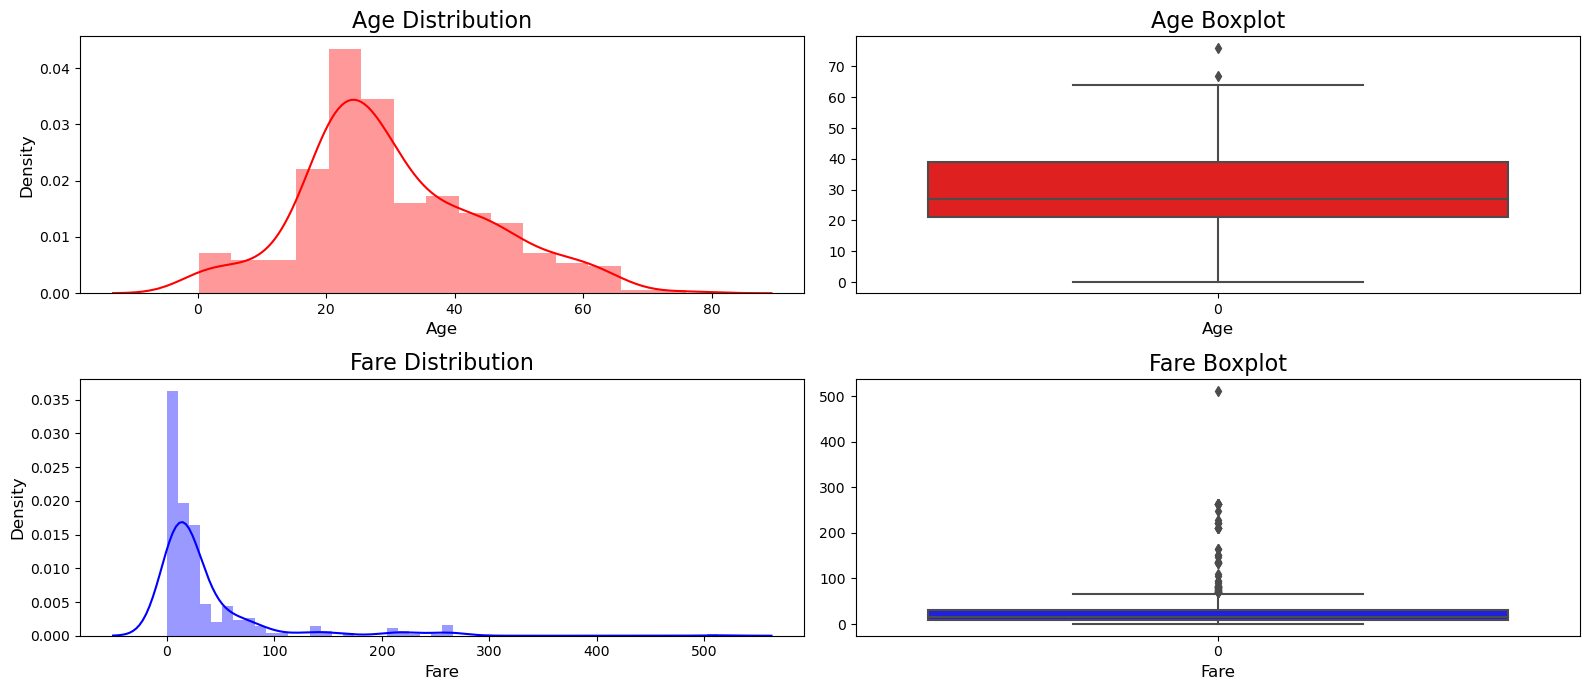

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 7))

# Plotting the Age distribution with a red color scheme
plt.subplot(2, 2, 1)
sns.distplot(titanic['Age'], color='red')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.subplot(2, 2, 2)
sns.boxplot(titanic['Age'], color='red')
plt.title('Age Boxplot', fontsize=16)
plt.xlabel('Age', fontsize=12)

# Plotting the Fare distribution with a green color scheme
plt.subplot(2, 2, 3)
sns.distplot(titanic['Fare'], color='blue')
plt.title('Fare Distribution', fontsize=16)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.subplot(2, 2, 4)
sns.boxplot(titanic['Fare'], color='blue')
plt.title('Fare Boxplot', fontsize=16)
plt.xlabel('Fare', fontsize=12)

plt.tight_layout()
plt.show()

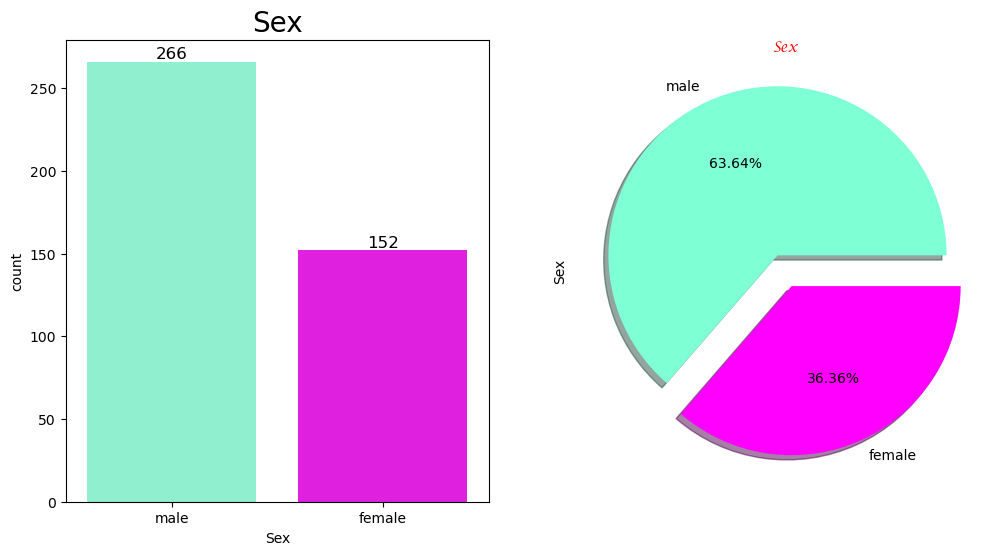

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
colors = ["Aquamarine", "Magenta"]

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Subplot 1 - Countplot
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=titanic, palette=colors)
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")  # Add labels to the bars
plt.title("Sex", fontsize=20)

# Subplot 2 - Pie chart
ax2 = plt.subplot(1, 2, 2)
titanic['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, colors=colors, ax=ax2)
ax2.set_title(label="Sex", fontsize=20, color='Red', font='Lucida Calligraphy')

# Show the plot
plt.show()

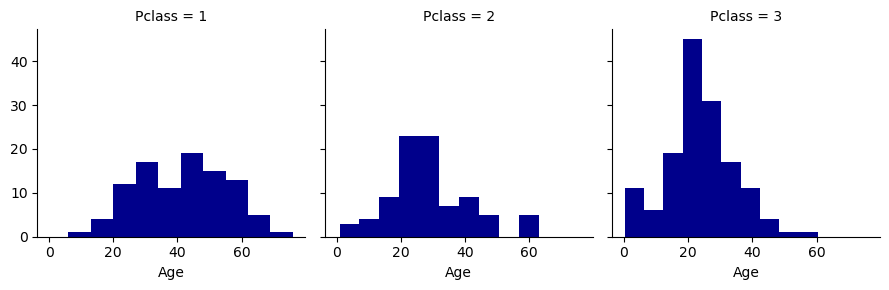

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'titanic' is your DataFrame

# Set the grape color
grape_color = "#00008B"

# Create a FacetGrid
g = sns.FacetGrid(titanic, col="Pclass")

# Map the histograms with the specified color
g = g.map(plt.hist, "Age", color=grape_color)

# Show the plot
plt.show()


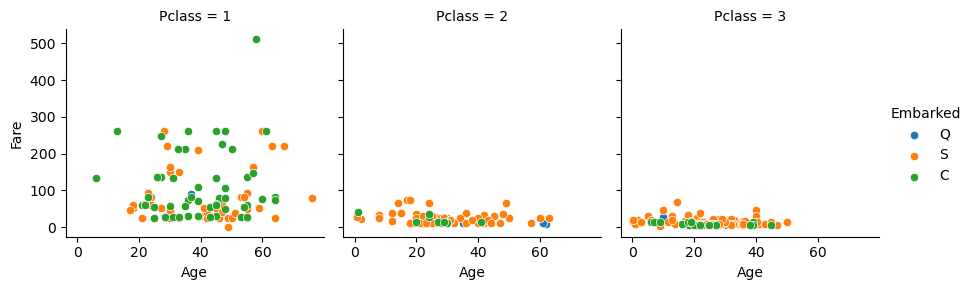

In [17]:
g = sns.FacetGrid(titanic, col="Pclass", hue="Embarked")
g.map_dataframe(sns.scatterplot, x="Age", y="Fare")
g.add_legend()
plt.show()

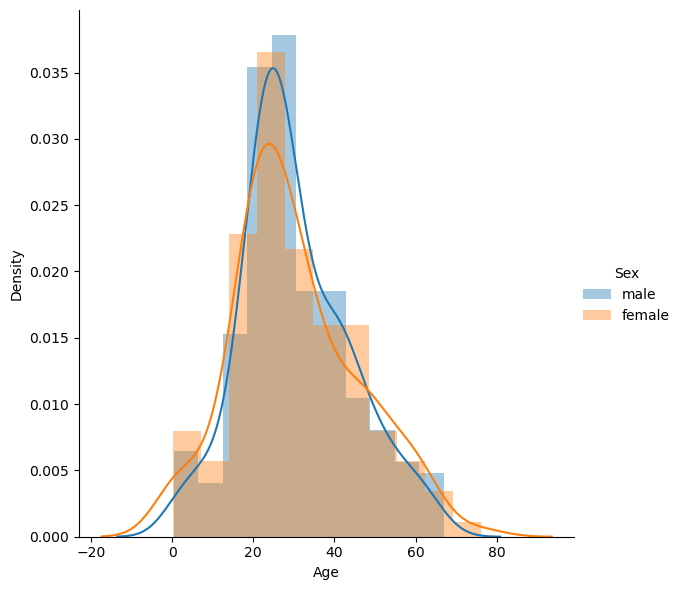

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(titanic, hue='Sex', height=6).map(sns.distplot, 'Age').add_legend()
plt.show()

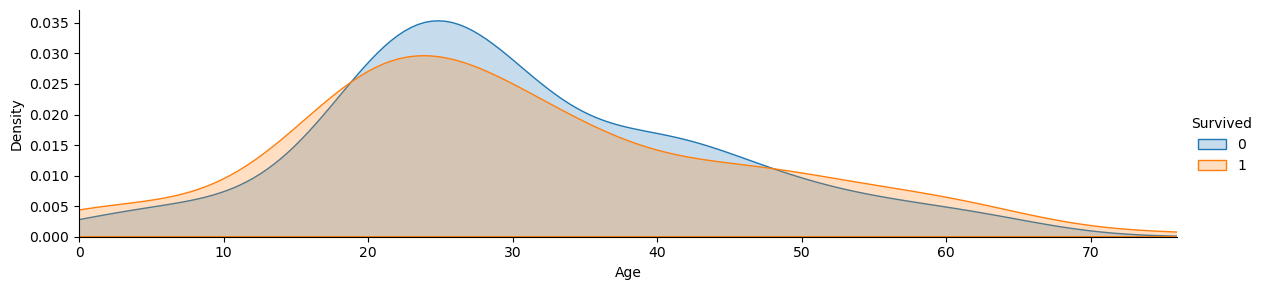

In [19]:
fig = sns.FacetGrid(titanic, hue="Survived", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

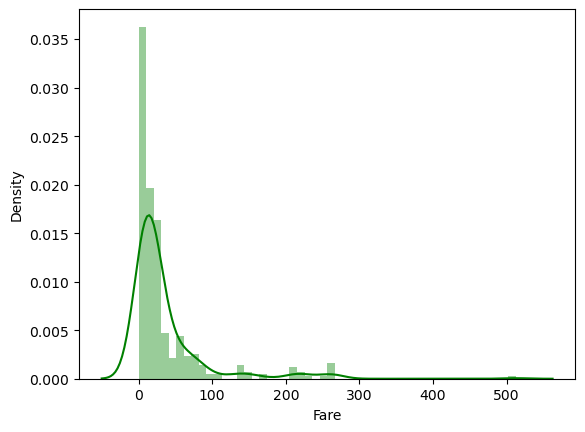

In [20]:
sns.distplot(titanic['Fare'],color="g")
plt.show()

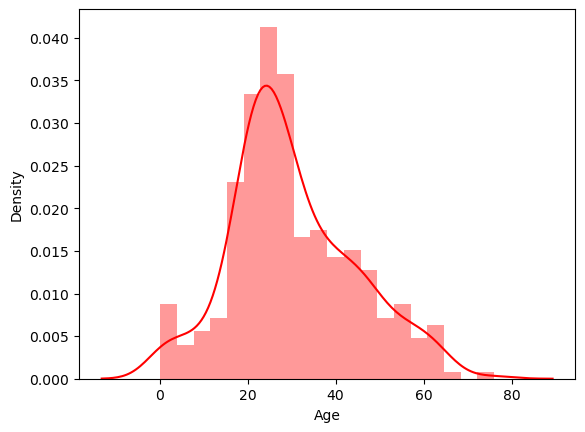

In [21]:
sns.distplot(titanic['Age'],color="r",bins=20,kde=True,)
plt.show()

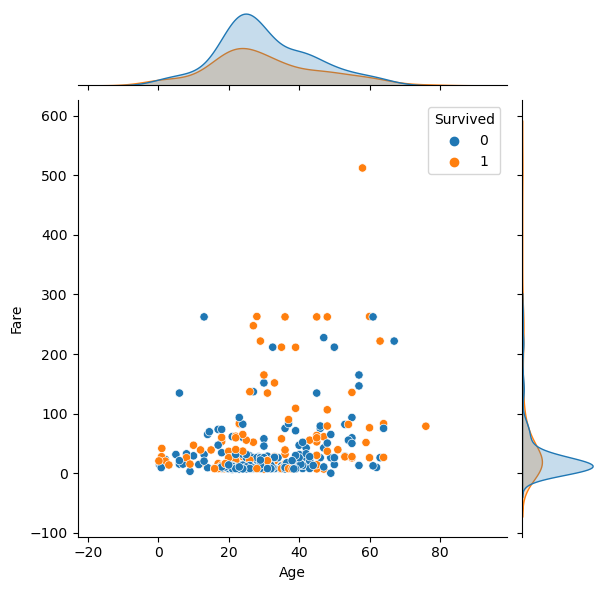

In [22]:
sns.jointplot(x="Age",y="Fare",data=titanic,color="Magenta",hue="Survived")
plt.show()

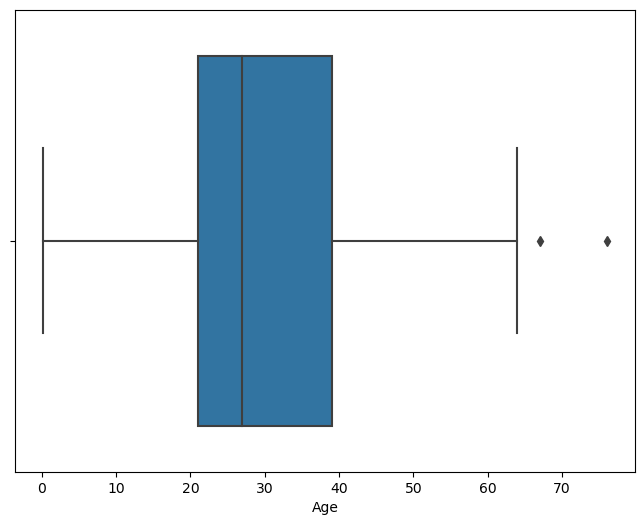

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=titanic["Age"])
plt.show()

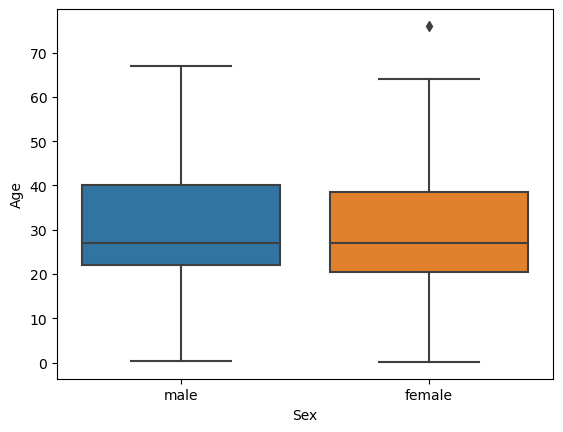

In [24]:
sns.boxplot(x='Sex', y = 'Age',data= titanic)
plt.show()

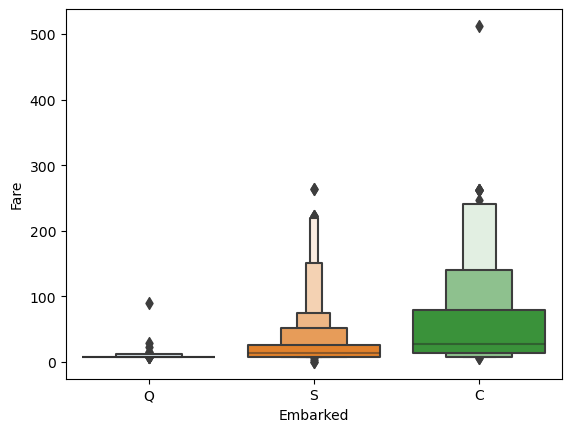

In [25]:
sns.boxenplot(y="Fare", x="Embarked", data=titanic)
plt.show()

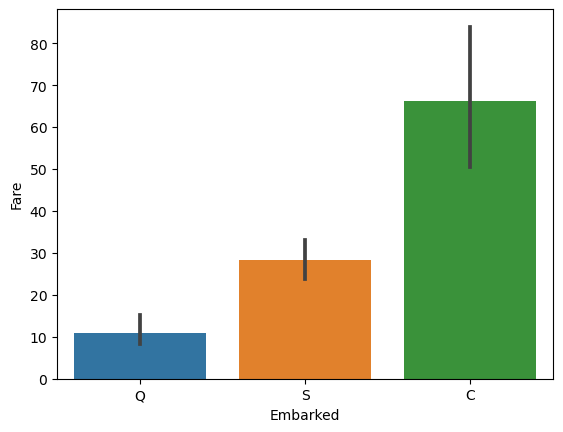

In [26]:
sns.barplot(y='Fare',x='Embarked',data=titanic)
plt.show()

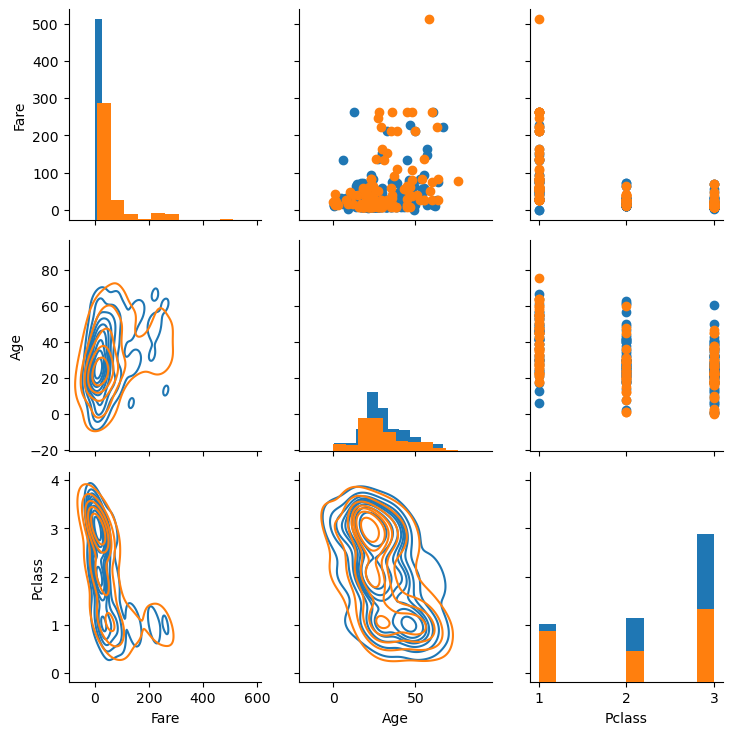

In [27]:
titanic_g = sns.PairGrid(titanic,hue='Sex',vars=['Fare','Age','Pclass'])
titanic_g.map_diag(plt.hist)
titanic_g.map_upper(plt.scatter)
titanic_g.map_lower(sns.kdeplot)
plt.show()

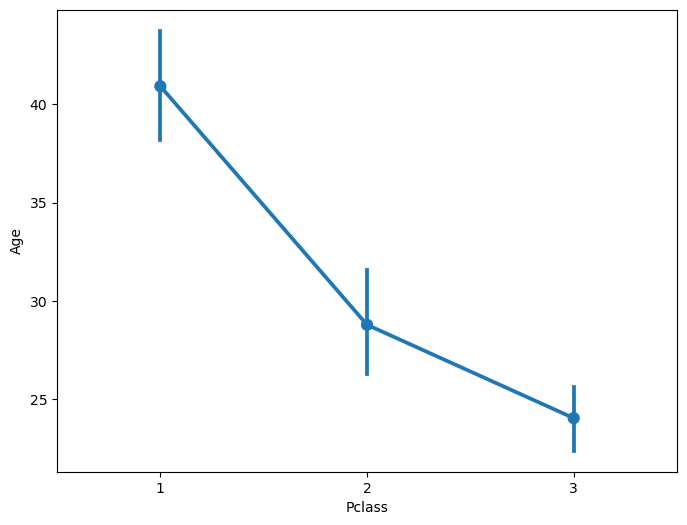

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="Pclass", y="Age", data=titanic)
plt.show()

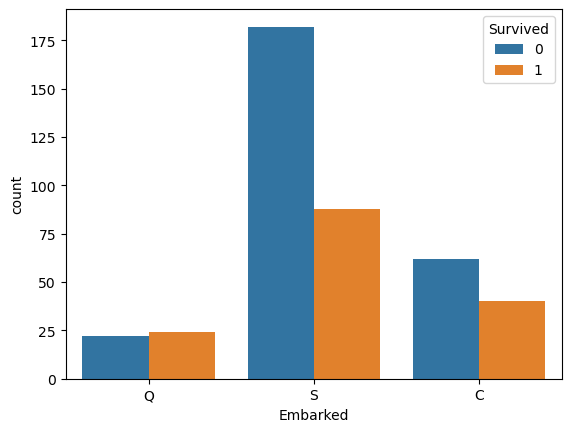

In [29]:
sns.countplot(data = titanic,x= 'Embarked',hue='Survived')
plt.show()

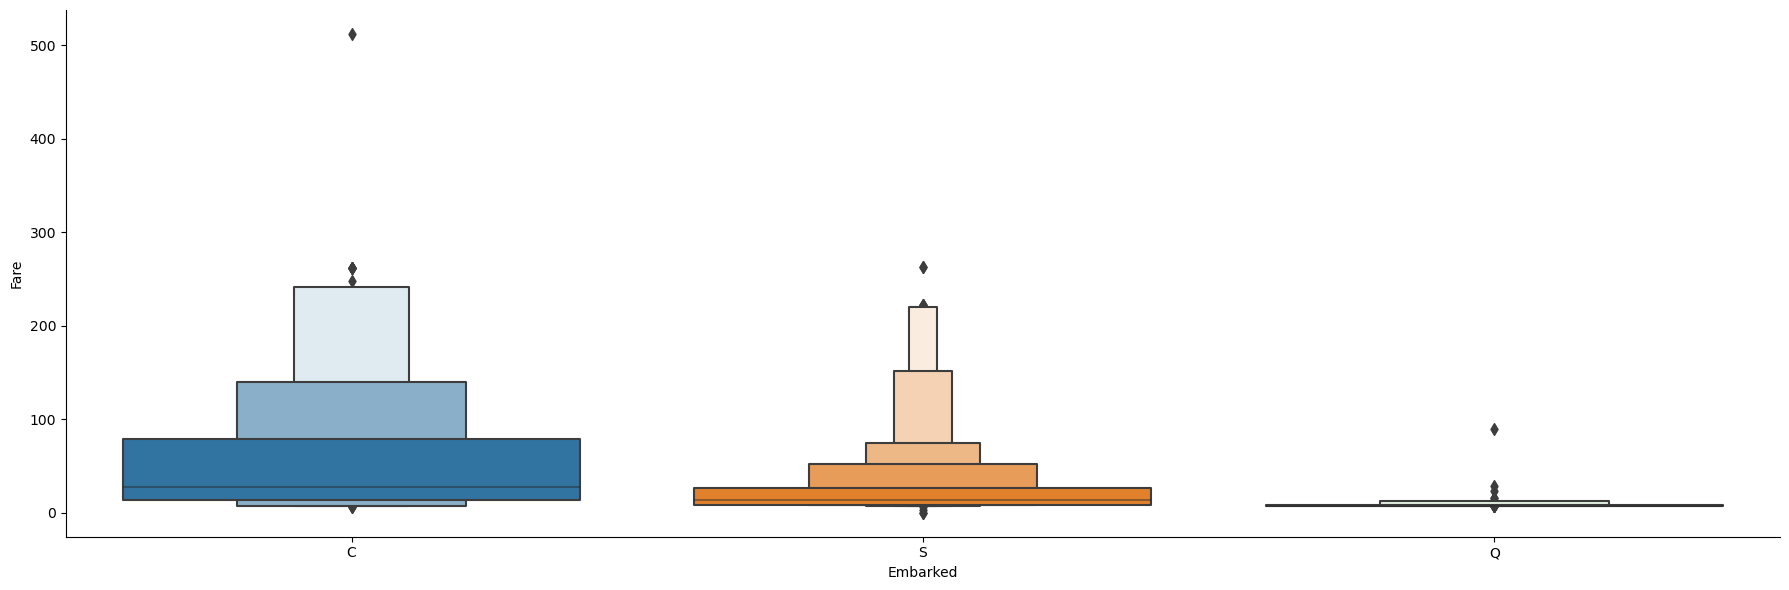

In [30]:
sns.catplot(y = "Fare", x = "Embarked", data = titanic.sort_values("Fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

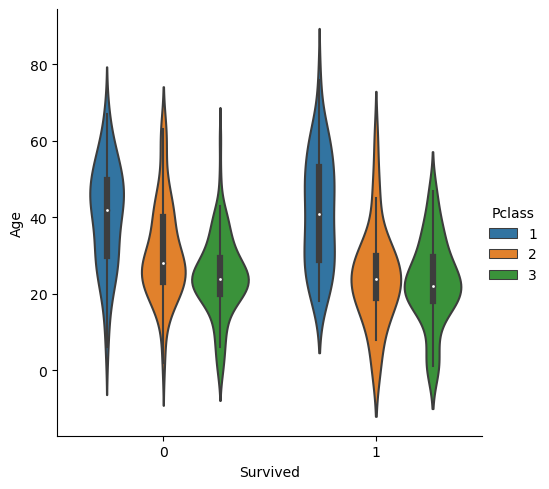

In [31]:
sns.catplot(data=titanic,x='Survived',y='Age',hue='Pclass',kind="violin")
plt.show()

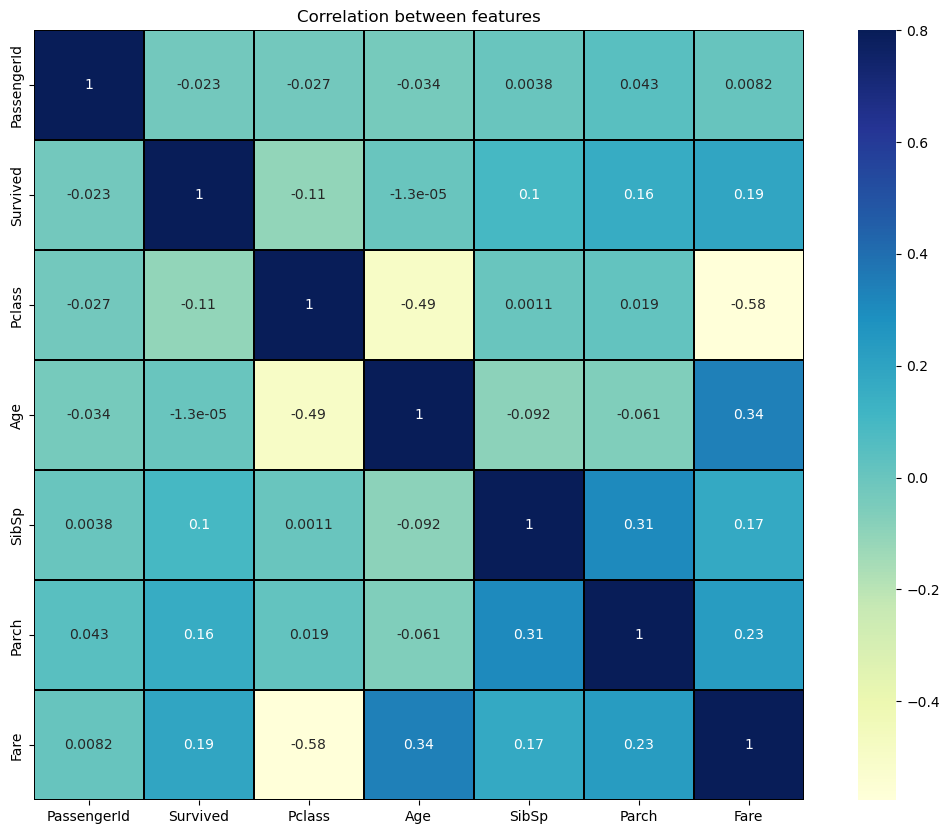

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the Titanic dataset into the 'titanic' DataFrame

# Drop non-numeric columns or select only numeric columns
numeric_columns = titanic.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor="black")
plt.title('Correlation between features')
plt.show()

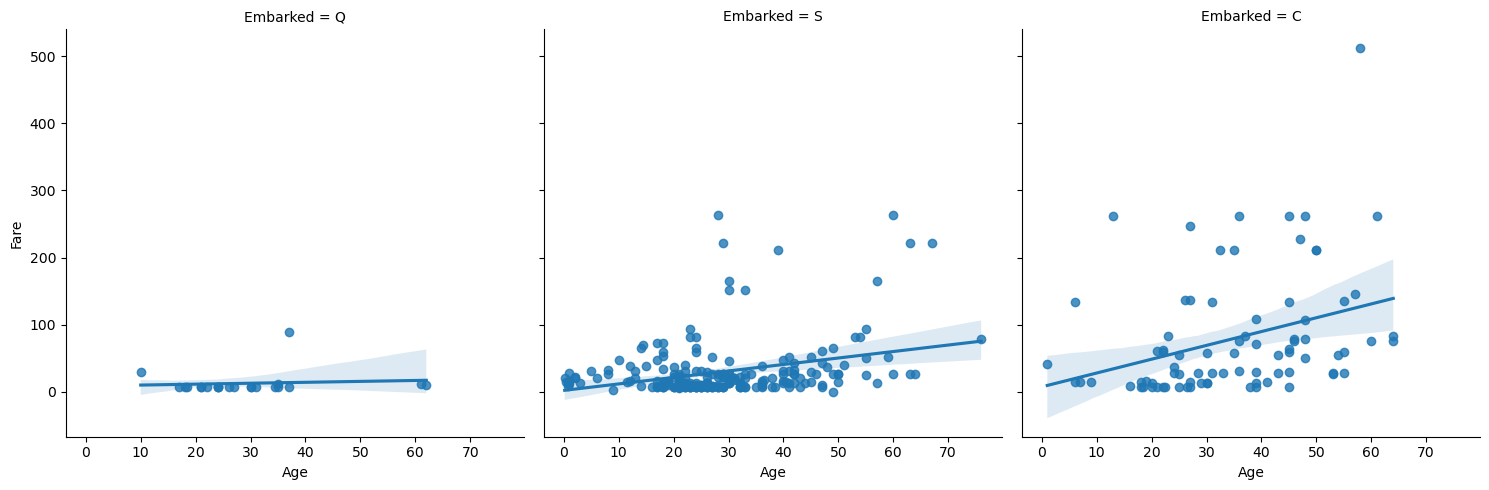

In [33]:
g= sns.lmplot(x="Age", y="Fare", col="Embarked", data=titanic)

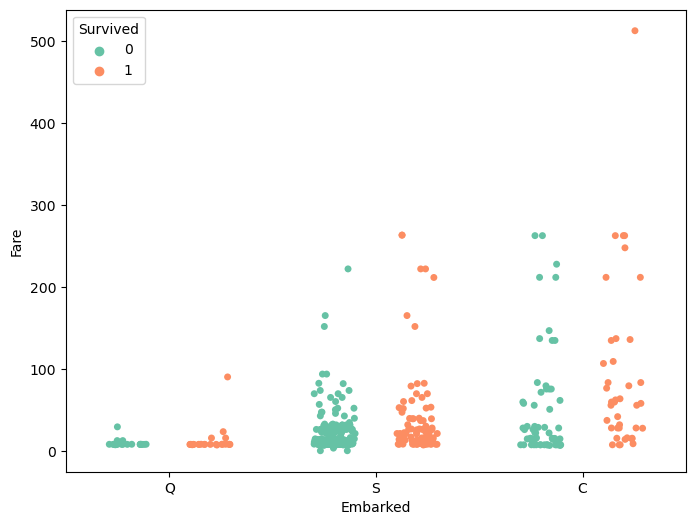

In [34]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="Embarked", y="Fare", hue="Survived",data=titanic, jitter=0.2, palette="Set2", dodge=True)
plt.show()

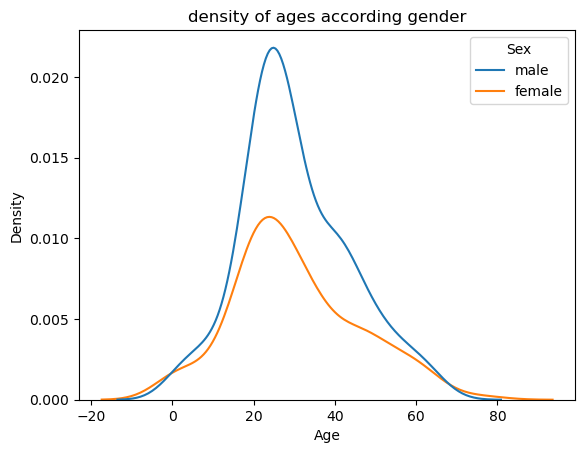

In [35]:
sns.kdeplot(data = titanic , x ="Age" , hue ="Sex" )
plt.title("density of ages according gender")
plt.show()

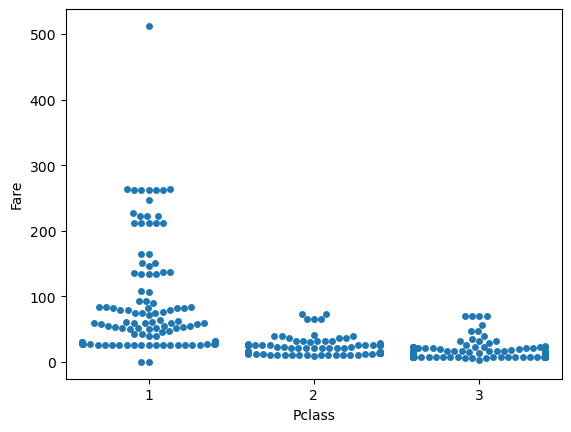

In [36]:
sns.swarmplot(x="Pclass", y="Fare", data=titanic)
plt.show()

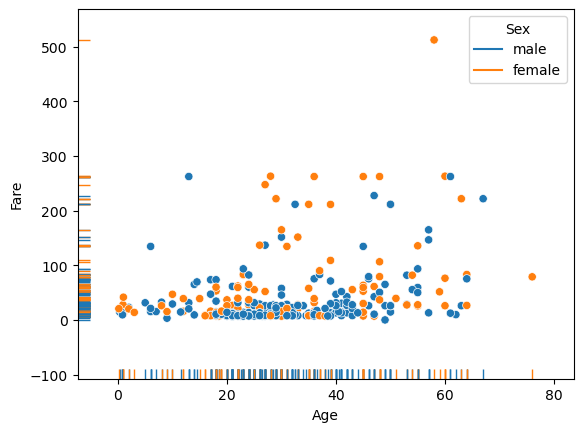

In [37]:
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Sex")
sns.rugplot(data=titanic, x="Age", y="Fare", hue="Sex")
plt.show()

In [38]:
titanic.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [39]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [40]:
missing(titanic)

,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


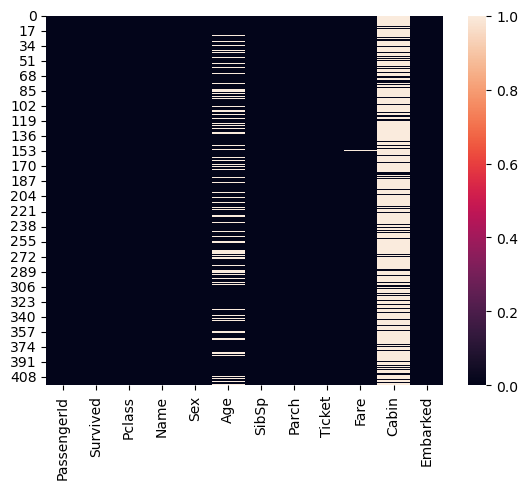

In [41]:
sns.heatmap(titanic.isnull());

In [42]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


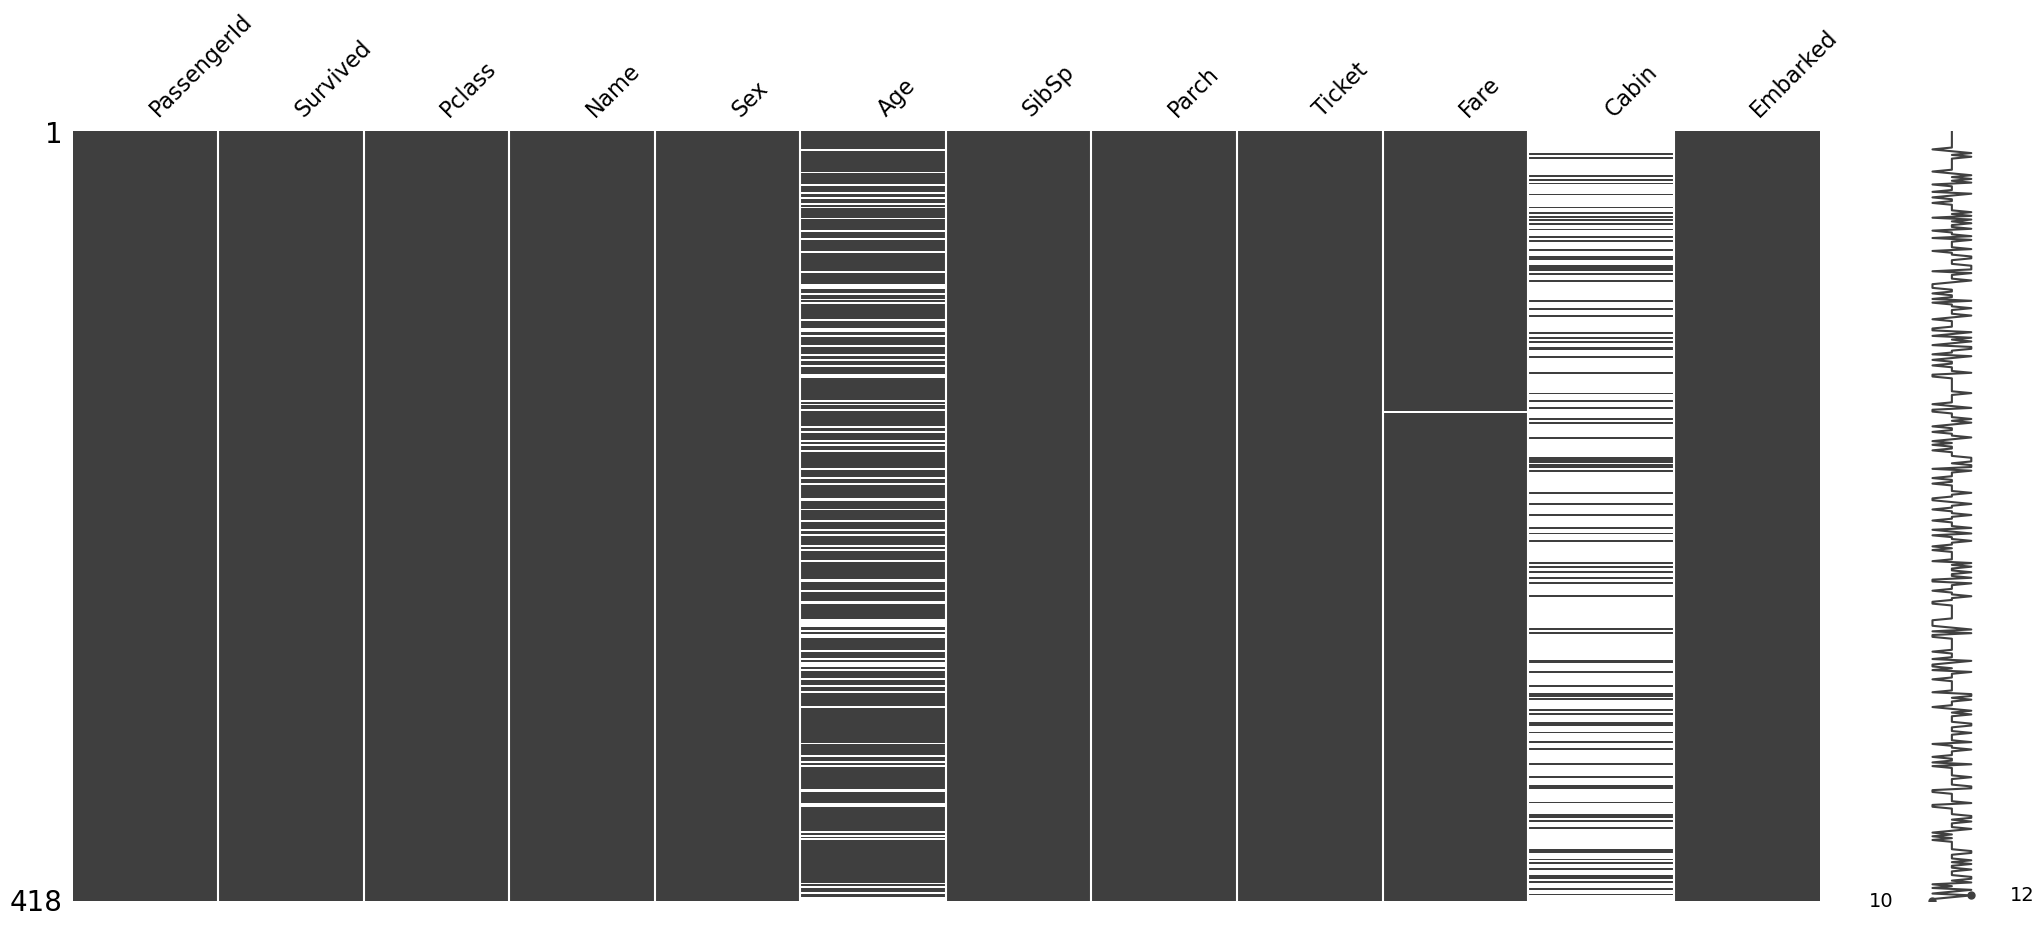

In [43]:
import missingno as msno
msno.matrix(titanic)
plt.show()

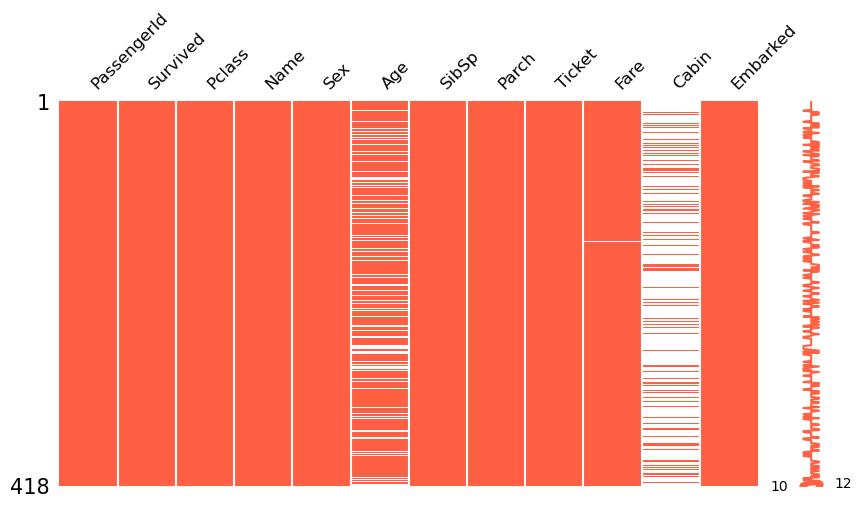

In [44]:
import missingno
missingno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

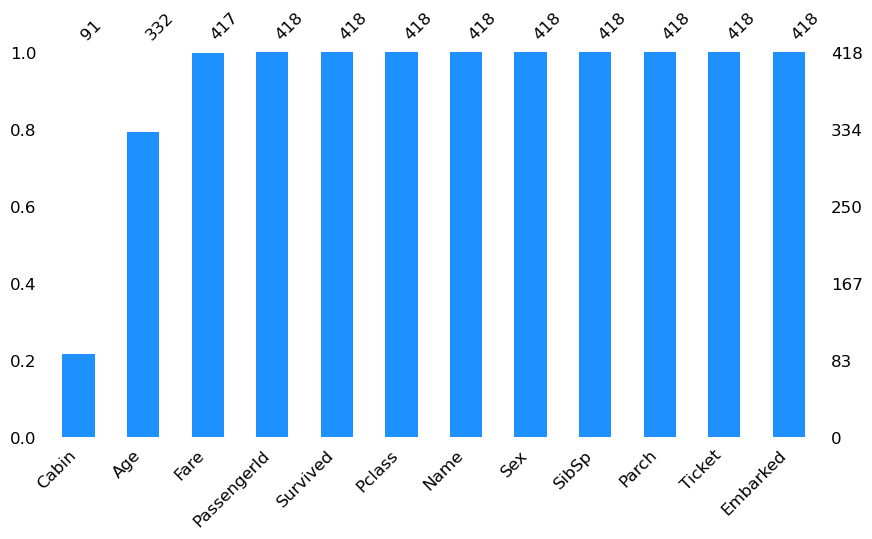

In [45]:
import missingno
missingno.bar(titanic, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

In [46]:
# Filled the missing value in Age column with the mean value
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

# Filled the missing value in Fare columns with mean Value
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

# Filled the missing value in Embarked columns with backfill method
titanic['Embarked'] = titanic['Embarked'].fillna(method='backfill')

In [47]:
# Drop the columns 
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
5,0,3,male,14.0,0,0,9.2250,S
6,1,3,female,30.0,0,0,7.6292,Q
7,0,2,male,26.0,1,1,29.0000,S
8,1,3,female,18.0,0,0,7.2292,C
9,0,3,male,21.0,2,0,24.1500,S


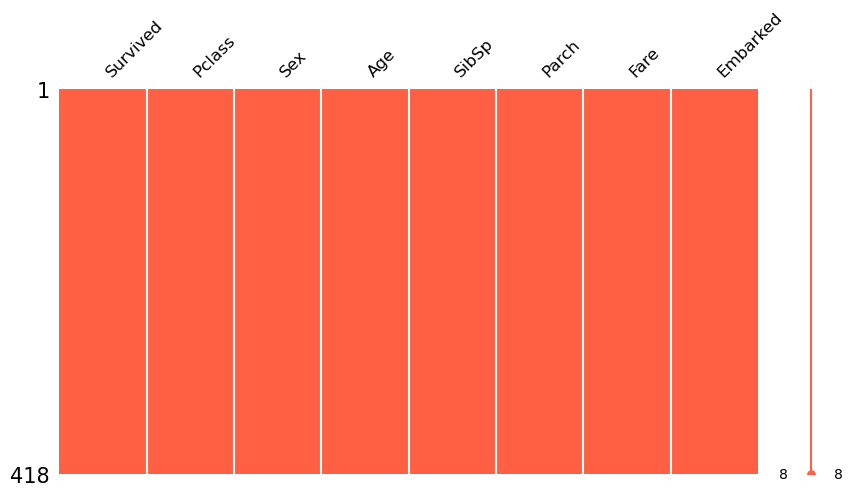

In [48]:
import missingno
missingno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

In [49]:
!pip install category_encoders

In [50]:
# Converting the categorical variable into the numerical variable by using category_encoder
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
titanic_encoded = encoder.fit_transform(titanic)
titanic_encoded.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.5,0,0,7.8292,1
1,2,1,2,47.0,1,0,7.0000,2
2,1,2,1,62.0,0,0,9.6875,1
3,1,1,1,27.0,0,0,8.6625,2
4,2,1,2,22.0,1,1,12.2875,2
5,1,1,1,14.0,0,0,9.2250,2
6,2,1,2,30.0,0,0,7.6292,1
7,1,2,1,26.0,1,1,29.0000,2
8,2,1,2,18.0,0,0,7.2292,3
9,1,1,1,21.0,2,0,24.1500,2


In [51]:
X = titanic_encoded.drop(['Survived'],axis=1)
y = titanic['Survived']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

In [53]:
X_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,3,2,64.00000,0,2,83.1583,3
201,1,1,0.33000,0,2,14.4000,2
336,2,1,32.00000,0,0,13.0000,2
187,1,1,17.00000,2,0,8.0500,2
214,1,2,38.00000,4,2,7.7750,2
283,1,2,9.00000,1,1,15.2458,3
19,1,2,45.00000,0,0,7.2250,3
282,1,2,30.27259,0,0,7.7500,1
142,3,1,61.00000,1,3,262.3750,3
348,2,1,24.00000,0,0,13.5000,2


In [54]:
y.head(10)

0    0
1    1
2    0
3    0
4    1
5    0
6    1
7    0
8    1
9    0
Name: Survived, dtype: int64

In [55]:
!pip install xgboost

In [56]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print("Training set score: {:.2f}".format(xgb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(xgb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_xgb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_xgb))
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
# Preprocess the data
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic[features]
y = titanic['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = xgb.XGBClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)

# Print metrics
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred_xgb)))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report: \n", classification_report(y_test, y_pred_xgb))


Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[50  0]
 [ 0 34]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

